# Chapter 6: Feature Detection and Extraction

***

<img src="./images/Features.png" alt="Features" width="1000"/>

***

# Example: NASA Mars Rover images

<img src="./images/Features2.png" alt="Features" width="1000"/>

***

<img src="./images/Features3.png" alt="Features" width="1000"/>

***

<img src="./images/Features4.png" alt="Features" width="1000"/>

***

<img src="./images/Features5.png" alt="Features" width="1000"/>

***

<img src="./images/Features6.png" alt="Features" width="1000"/>

***

<img src="./images/Features7.png" alt="Features" width="1000"/>

***

# Harris corner detection

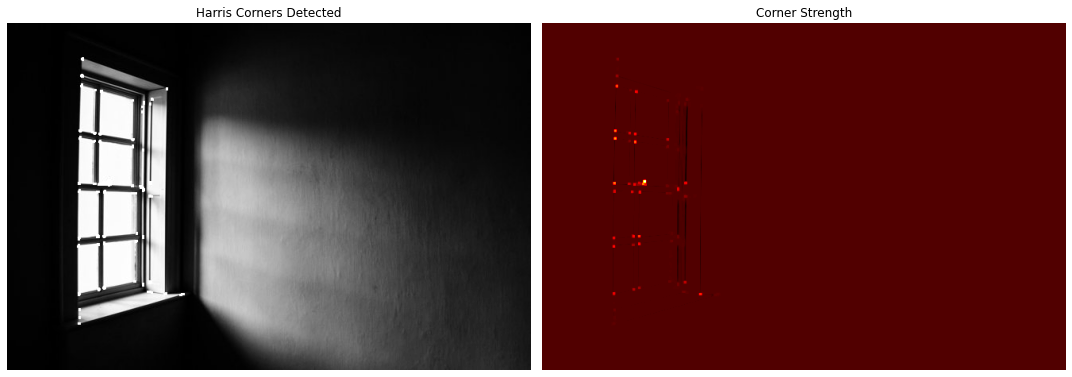

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('./images/window.jpg', cv2.IMREAD_GRAYSCALE)  # You can use any image path here

# Step 1: Apply Harris Corner Detection
block_size = 2
ksize = 3
k = 0.04
corners = cv2.cornerHarris(img, blockSize=block_size, ksize=ksize, k=k)

# Step 2: Dilate the corners to mark them
corners = cv2.dilate(corners, None)

# Step 3: Threshold the corners
threshold = 0.01 * corners.max()
img[corners > threshold] = 255  # Mark corners on the original image

# Display the results
plt.figure(figsize=(15, 7))  # Increase the figure size
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Harris Corners Detected')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(corners, cmap='hot')
plt.title('Corner Strength')
plt.axis('off')

plt.tight_layout()
plt.show()

# Shi-Tomasi corner detection

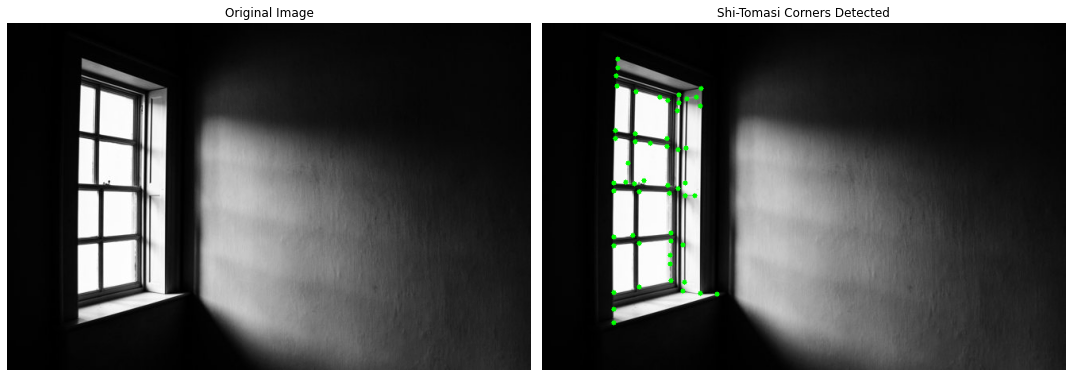

In [8]:
# The Shi-Tomasi Corner Detection method is an improvement over Harris detection

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('./images/window.jpg', cv2.IMREAD_GRAYSCALE)  # You can use any image path here

# Step 1: Apply Shi-Tomasi Corner Detection
corners = cv2.goodFeaturesToTrack(img, maxCorners=100, qualityLevel=0.01, minDistance=10)

# Step 1: Apply Shi-Tomasi Corner Detection
corners = cv2.goodFeaturesToTrack(img, maxCorners=100, qualityLevel=0.01, minDistance=10)

# Step 2: Draw corners on the image
img_corners = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
if corners is not None:
    for corner in corners:
        x, y = corner.ravel()
        cv2.circle(img_corners, (int(x), int(y)), 3, (0, 255, 0), -1)

# Display the results
plt.figure(figsize=(15, 7))  # Increase the figure size
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_corners)
plt.title('Shi-Tomasi Corners Detected')
plt.axis('off')

plt.tight_layout()
plt.show()

# Blob detection

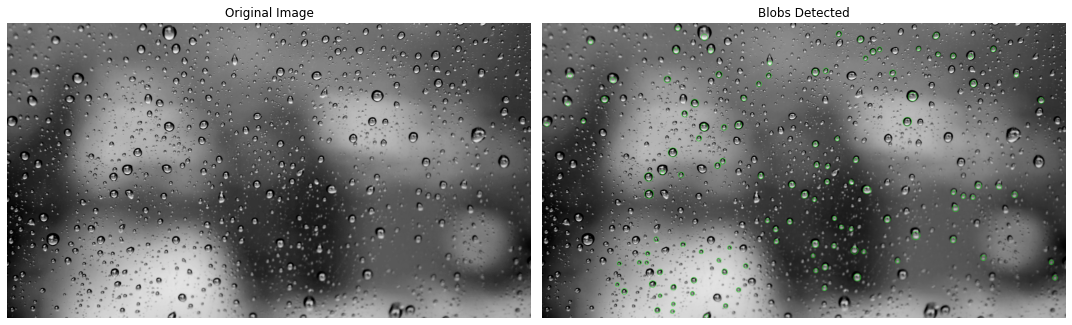

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('./images/rain.png', cv2.IMREAD_GRAYSCALE)  # You can use any image path here

# Step 1: Set up the SimpleBlobDetector parameters
params = cv2.SimpleBlobDetector_Params()

# Set the parameters for blob detection
params.filterByColor = True
params.blobColor = 255  # Only detect white blobs
params.filterByArea = True
params.minArea = 150
params.maxArea = 1000
params.filterByCircularity = True
params.minCircularity = 0.5
params.filterByConvexity = True
params.minConvexity = 0.9
params.filterByInertia = True
params.minInertiaRatio = 0.01

# Step 2: Create a detector with the parameters
detector = cv2.SimpleBlobDetector_create(params)

# Step 3: Detect blobs
keypoints = detector.detect(img)

# Step 4: Draw detected blobs as red circles
img_with_blobs = cv2.drawKeypoints(img, keypoints, np.array([]), (0, 255, 0), 
                                     cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the results
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_with_blobs)
plt.title('Blobs Detected')
plt.axis('off')

plt.tight_layout()
plt.show()

# Blob detection (MSER)

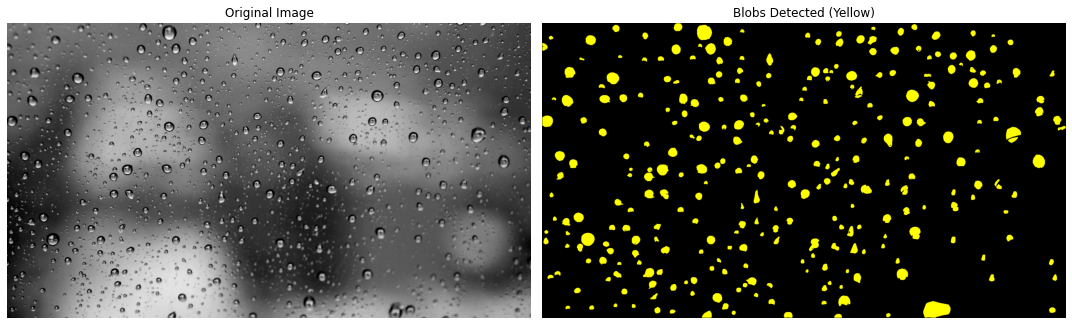

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('./images/rain.png', cv2.IMREAD_GRAYSCALE)  # You can use any image path here

# Step 1: Initialize MSER detector
mser = cv2.MSER_create()

# Step 2: Detect regions
regions, _ = mser.detectRegions(img)

# Step 3: Create an empty mask to draw blobs
mask = np.zeros_like(img)

# Step 4: Draw detected regions on the mask
for region in regions:
    if cv2.contourArea(region) > 150:  # Filter based on area
        cv2.drawContours(mask, [region], -1, (255), thickness=cv2.FILLED)

# Convert the mask to a 3-channel image to overlay in yellow
img_with_blobs = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)

# Step 5: Overlay the yellow blobs on the original image
img_with_blobs[np.where((img_with_blobs == [255, 255, 255]).all(axis=2))] = [0, 255, 255]  # Yellow in BGR

# Display the results
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_with_blobs, cv2.COLOR_BGR2RGB))  # Convert to RGB for plotting
plt.title('Blobs Detected (Yellow)')
plt.axis('off')

plt.tight_layout()
plt.show()

***

<img src="./images/SIFT.png" alt="SIFT" width="1000"/>

# SIFT

SIFT (Scale-Invariant Feature Transform) is a powerful feature detection algorithm in computer vision used for identifying and describing local features in images. It is particularly effective in matching key points between different images of the same object, even when they are taken from different viewpoints or under varying lighting conditions.

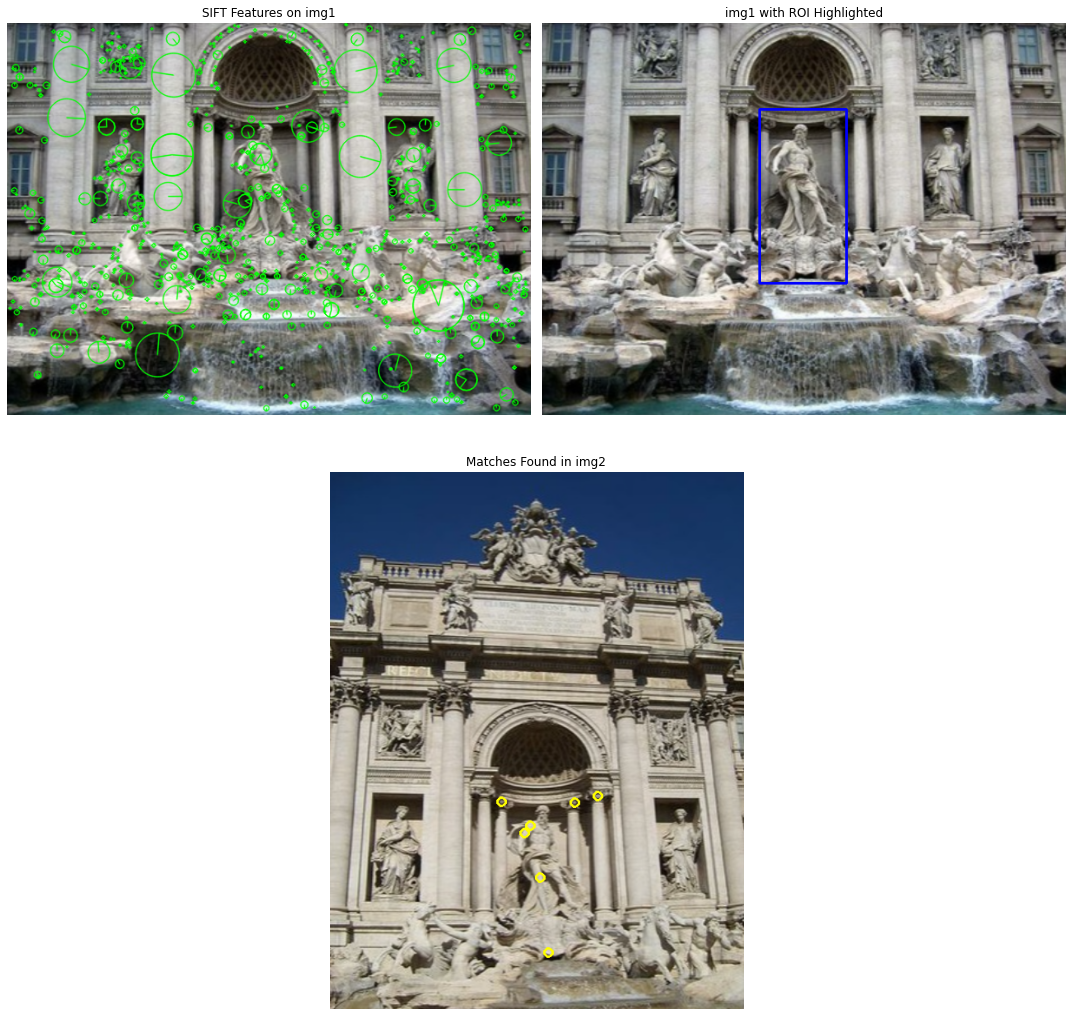

In [72]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the two RGB images
img1 = cv2.imread('./images/SIFT1.png')  # Query image
img2 = cv2.imread('./images/SIFT2.png')  # Train image

# Step 1: Initialize the SIFT detector with more features
sift = cv2.SIFT_create(nfeatures=1000)

# Step 2: Convert images to grayscale for SIFT detection
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Step 3: Detect keypoints and compute descriptors for both images
keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

# Step 4: Define a region of interest (ROI) in img1
x, y, w, h = 250, 100, 100, 200  # Updated coordinates
roi = gray1[y:y+h, x:x+w]  # Extract the region of interest
roi_keypoints, roi_descriptors = sift.detectAndCompute(roi, None)

# Draw the rectangle on img1 to indicate the ROI
roi_color = (255, 0, 0)  # Blue color for the ROI rectangle
img1_with_roi = img1.copy()
cv2.rectangle(img1_with_roi, (x, y), (x + w, y + h), roi_color, 2)

# Step 5: Match descriptors using KNN
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)
matches = bf.knnMatch(roi_descriptors, descriptors2, k=2)

# Step 6: Apply Lowe's ratio test
# Lower Threshold (0.6 - 0.7):
# This is more selective and may result in fewer but higher-quality matches. 
# It is often used when precision is more important than recall.

# Higher Threshold (0.8 - 0.9):
# This allows for more matches, which might be helpful in scenarios where you expect many correspondences. 
# However, it can increase the chances of incorrect matches.

good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:  # Use a threshold of 0.75
        good_matches.append(m)

# Step 7: Draw matches on img2 (only for the good matches)
img2_with_matches = img2.copy()
for match in good_matches:
    x_match, y_match = int(keypoints2[match.trainIdx].pt[0]), int(keypoints2[match.trainIdx].pt[1])
    cv2.circle(img2_with_matches, (x_match, y_match), 5, (0, 255, 255), 2)  # Draw circles on matched points

# Step 8: Plot all three images with img2 on a new line
plt.figure(figsize=(15, 15))

# SIFT Features on img1 (first plot)
img1_with_keypoints = cv2.drawKeypoints(img1, keypoints1, None, (0, 255, 0),
                                         flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.subplot(2, 2, 1)  # 2 rows, 2 columns, 1st subplot
plt.imshow(cv2.cvtColor(img1_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('SIFT Features on img1')
plt.axis('off')

# Original img1 with ROI (second plot)
plt.subplot(2, 2, 2)  # 2 rows, 2 columns, 2nd subplot
plt.imshow(cv2.cvtColor(img1_with_roi, cv2.COLOR_BGR2RGB))
plt.title('img1 with ROI Highlighted')
plt.axis('off')

# img2 with Matches (third plot)
plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd subplot
plt.imshow(cv2.cvtColor(img2_with_matches, cv2.COLOR_BGR2RGB))
plt.title('Matches Found in img2')
plt.axis('off')

# Show the plot
plt.tight_layout()
plt.show()

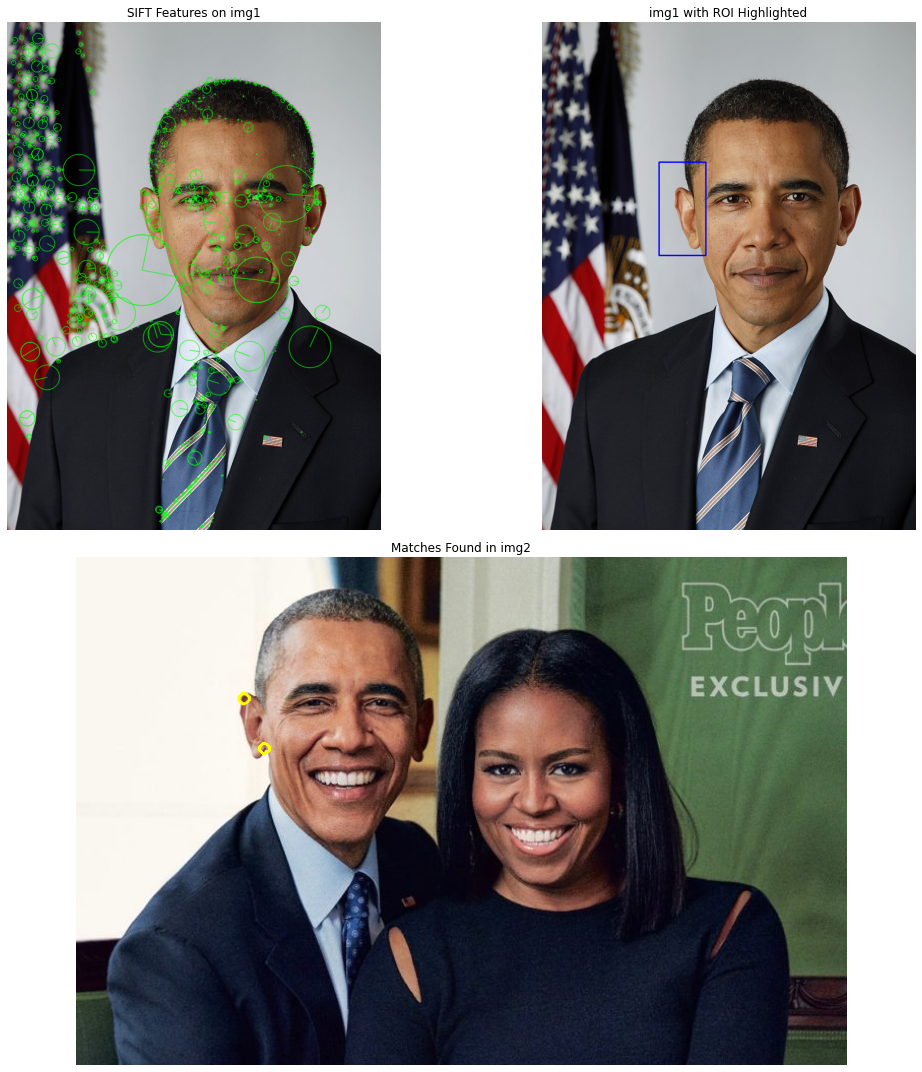

In [98]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the two RGB images
img1 = cv2.imread('./images/obama2.jpg')  # Query image
img2 = cv2.imread('./images/obamas.jpg')  # Train image

# Step 1: Initialize the SIFT detector with more features
sift = cv2.SIFT_create(nfeatures=0, contrastThreshold=0.04, edgeThreshold=10)

# Step 2: Convert images to grayscale for SIFT detection
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Step 3: Detect keypoints and compute descriptors for both images
keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

# Step 4: Define a region of interest (ROI) in img1
x, y, w, h = 250, 300, 100, 200  # Updated coordinates
roi = gray1[y:y+h, x:x+w]  # Extract the region of interest
roi_keypoints, roi_descriptors = sift.detectAndCompute(roi, None)

# Draw the rectangle on img1 to indicate the ROI
roi_color = (255, 0, 0)  # Blue color for the ROI rectangle
img1_with_roi = img1.copy()
cv2.rectangle(img1_with_roi, (x, y), (x + w, y + h), roi_color, 2)

# Step 5: Match descriptors using KNN
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)
matches = bf.knnMatch(roi_descriptors, descriptors2, k=2)

# Step 6: Apply Lowe's ratio test
# Lower Threshold (0.6 - 0.7):
# This is more selective and may result in fewer but higher-quality matches. 
# It is often used when precision is more important than recall.

# Higher Threshold (0.8 - 0.9):
# This allows for more matches, which might be helpful in scenarios where you expect many correspondences. 
# However, it can increase the chances of incorrect matches.

good_matches = []
for m, n in matches:
    if m.distance < 0.818 * n.distance:  # Use a threshold of 0.75
        good_matches.append(m)

# Step 7: Draw matches on img2 (only for the good matches)
img2_with_matches = img2.copy()
for match in good_matches:
    x_match, y_match = int(keypoints2[match.trainIdx].pt[0]), int(keypoints2[match.trainIdx].pt[1])
    cv2.circle(img2_with_matches, (x_match, y_match), 5, (0, 255, 255), 2)  # Draw circles on matched points

# Step 8: Plot all three images with img2 on a new line
plt.figure(figsize=(15, 15))

# SIFT Features on img1 (first plot)
img1_with_keypoints = cv2.drawKeypoints(img1, keypoints1, None, (0, 255, 0),
                                         flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.subplot(2, 2, 1)  # 2 rows, 2 columns, 1st subplot
plt.imshow(cv2.cvtColor(img1_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('SIFT Features on img1')
plt.axis('off')

# Original img1 with ROI (second plot)
plt.subplot(2, 2, 2)  # 2 rows, 2 columns, 2nd subplot
plt.imshow(cv2.cvtColor(img1_with_roi, cv2.COLOR_BGR2RGB))
plt.title('img1 with ROI Highlighted')
plt.axis('off')

# img2 with Matches (third plot)
plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd subplot
plt.imshow(cv2.cvtColor(img2_with_matches, cv2.COLOR_BGR2RGB))
plt.title('Matches Found in img2')
plt.axis('off')

# Show the plot
plt.tight_layout()
plt.show()